In [1]:
import numpy as np 
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import csv
import math
import struct
%matplotlib inline
import random
import matplotlib.pyplot as plt
import struct
from array import array
from os.path  import join


In [2]:

# Define the transformation to convert the images to tensor
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the MNIST training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Download and load the MNIST test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoader can be used to create batches of tensors
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9912422/9912422 [00:00<00:00, 33370344.08it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28881/28881 [00:00<00:00, 1114578.12it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1648877/1648877 [00:00<00:00, 8363738.10it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4542/4542 [00:00<00:00, 6256331.29it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [286]:
images, labels = next(iter(train_loader))
print(f'Image batch dimensions: {images.shape}')
print(f'Label batch dimensions: {labels.shape}')



Image batch dimensions: torch.Size([10, 1, 28, 28])
Label batch dimensions: torch.Size([10])


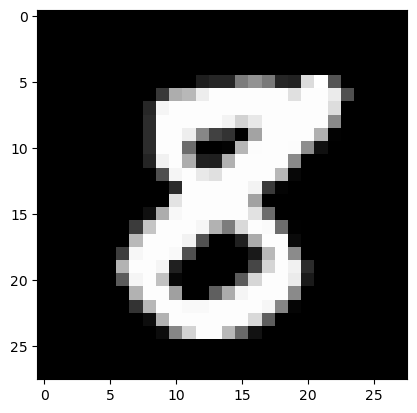

In [287]:
plt.imshow(images[0].squeeze(), cmap='gray')

In [288]:
print(images[0].view(images[0].size(), -1))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

## Regular auto-enocoder


In [4]:
class AE(nn.Module):
    def __init__(self, input_dim, hidden_dim, encode_dim):
        super().__init__()

        self.encoder = nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, encode_dim)
        )

        self.decoder = nn.Sequential(
                nn.Linear(encode_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, input_dim)
        )
   


    def forward(self, x, **kwargs):
        #x = [Batch size, height, width]
        batch_size = x.shape[0]

        #batch size, h * w
        x = x.view(batch_size, -1)
        encode = self.encoder(x)
        # print(f'encoder output shape = {encode.shape}')
        decode = self.decoder(encode)
        # print(f'decoder output shape = {decode.shape}')
        return decode


In [5]:
INPUT_DIM = 28 * 28
HIDDEN_DIM = 150
ENCODE_DIM = 5

model = AE(INPUT_DIM, HIDDEN_DIM, ENCODE_DIM)

In [6]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(model))

237789


In [7]:
images, labels = next(iter(train_loader))

output = model(images[1])
logits = F.softmax(output, dim=1)

prediction = torch.argmax(logits, dim=1)

print(logits)

tensor([[0.0017, 0.0013, 0.0011, 0.0013, 0.0012, 0.0011, 0.0013, 0.0009, 0.0013,
         0.0014, 0.0012, 0.0012, 0.0012, 0.0014, 0.0013, 0.0014, 0.0013, 0.0014,
         0.0011, 0.0016, 0.0013, 0.0011, 0.0010, 0.0013, 0.0012, 0.0016, 0.0011,
         0.0014, 0.0013, 0.0012, 0.0014, 0.0012, 0.0013, 0.0013, 0.0011, 0.0011,
         0.0015, 0.0011, 0.0013, 0.0013, 0.0012, 0.0010, 0.0014, 0.0013, 0.0012,
         0.0014, 0.0013, 0.0013, 0.0013, 0.0015, 0.0013, 0.0012, 0.0013, 0.0011,
         0.0012, 0.0011, 0.0012, 0.0013, 0.0010, 0.0011, 0.0011, 0.0014, 0.0012,
         0.0012, 0.0013, 0.0011, 0.0015, 0.0013, 0.0015, 0.0010, 0.0017, 0.0015,
         0.0011, 0.0012, 0.0013, 0.0011, 0.0014, 0.0012, 0.0013, 0.0011, 0.0012,
         0.0014, 0.0012, 0.0015, 0.0011, 0.0014, 0.0014, 0.0016, 0.0011, 0.0015,
         0.0012, 0.0013, 0.0011, 0.0011, 0.0015, 0.0010, 0.0010, 0.0014, 0.0014,
         0.0013, 0.0014, 0.0010, 0.0012, 0.0012, 0.0016, 0.0012, 0.0013, 0.0013,
         0.0012, 0.0011, 0.0

In [8]:
EPOCHS = 50
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss = nn.MSELoss()


for epoch in range(EPOCHS):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()  # Clear gradients from the previous step

        # print(data.shape)
        # Forward pass: compute the model output
        output = model(data)

        # if output.shape[0] != 64:
        #     print(f'batch dim is not 64 for idx {batch_idx}')
        # Calculate the loss
        lossi = loss(output, data.view(output.shape)) 

        # Backward pass: compute gradients
        lossi.backward()

        # Update the model parameters
        optimizer.step()

        running_loss += lossi.item()

    # Print epoch summary
    print(f"Epoch [{epoch + 1}/{EPOCHS}], Loss: {running_loss / len(train_loader):.4f}")

print("Training finished.")

Epoch [1/50], Loss: 0.0844
Epoch [2/50], Loss: 0.0660


KeyboardInterrupt: 

In [8]:
images, labels = next(iter(test_loader))

model.eval()
with torch.no_grad():
    output = model(images[12])
logits = F.softmax(output)

print(logits.shape)
logits = logits.squeeze()
logits = logits.view(28,28)

plt.imshow(logits)

print(prediction)

NameError: name 'model' is not defined

In [ ]:
plt.imshow(images[12].squeeze())

## Variational Auto-Encoder

Algorithm 1 Minibatch version of the Auto-Encoding VB (AEVB) algorithm. Either of the two
SGVB estimators in section 2.3 can be used. We use settings M = 100 and L= 1 in experiments.
θ,φ ←Initialize parameters
repeat
    XM ←Random minibatch of M datapoints (drawn from full dataset)
    ϵ ←Random samples from noise distribution p(ϵ)
    g ←∇θ,φLM(θ,φ; XM
    ,ϵ) (Gradients of minibatch estimator (8))
    θ,φ ←Update parameters using gradients g (e.g. SGD or Adagrad [DHS10])
until convergence of parameters (θ,φ)
return θ,φ

In [510]:
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(
                nn.Linear(self.input_dim, self.hidden_dim),
                nn.LeakyReLU(0.2),
                nn.Linear(self.hidden_dim, self.hidden_dim),
                nn.LeakyReLU(0.2),
        )

        self.mu_mlp = nn.Linear(self.hidden_dim, self.latent_dim)
        self.var_mlp = nn.Linear(self.hidden_dim, self.latent_dim)

        self.decoder = nn.Sequential(
                nn.Linear(self.latent_dim, self.hidden_dim),
                nn.LeakyReLU(0.2),
                nn.Linear(self.hidden_dim, self.hidden_dim),
                nn.LeakyReLU(0.2),
                nn.Linear(self.hidden_dim, self.input_dim),
                nn.Sigmoid()
        )

    def forward(self, x):
        #x = [Batch size, height, width]
        batch_size = x.shape[0]

        #batch size, h * w
        x = x.view(batch_size, self.input_dim)
        encoding = self.encode(x)
        mu, log_var = encoding
        decoded = self.decode(*encoding)
        # print(f'decoded shape: {decoded.shape}')
        
        return decoded, mu, log_var

    def encode(self, input):
        encoding = self.encoder(input)
        mu = self.mu_mlp(encoding)
        log_var = self.var_mlp(encoding)

        return mu, log_var

    def decode(self, mu, log_var):
        z = self.reparameterize(mu, log_var)
        z = z.view(-1, self.latent_dim)
        # print(f'z shape: {z.shape}')
        decoding = self.decoder(z)
        
        return decoding
    
    def reparameterize(self, mu, log_var):
        # Reparameterization trick:
        # let z ~= q_psi(z|x)
        # reparamterize z = g_psi(x, epsilon)
        # z = mu_i + sig_i * epsilon
        sig = torch.exp(log_var * 0.5)
        # print(sig)
        
        epsilon = torch.randn_like(sig)  # Random noise from a standard normal distribution.
        z = mu + torch.mul(sig, epsilon)

        return z
    
    def loss_function(self, output, target, mu, log_var, epoch):
        #here is the bread and butter
        #were looking to optimize mu and sigma
        #L ~= 1/2*sum(1 + log(sig^2)) - (mu)^2 - (sig)^2) + 1/L * sum(log(p_theta(x|z)))
        # the second term is a a gaussian MLP 
            # in this case p_theta(x|z) = gaussian(mu, sig^2)

        # recon_loss = torch.mean((output - target)**2)
        recon_loss = F.binary_cross_entropy(output, target, reduction='sum')

        # print(f'mse loss: {mse_loss}')
        # print(f'pytorch mse: {F.mse_loss(output, target)}')
        # KL_div = torch.mean(-0.5 * torch.sum(1 + log_var - mu**2 - torch.exp(log_var), dim=1), dim = 0)
        KL_div = -0.5 * torch.sum(1 + log_var - mu**2 - torch.exp(log_var))

        # print(f'kl div: {KL_div}')
        beta = 4.0
        kl_weight = min(1.0, epoch / 20.0)  # Gradually increase beta over the first 10 epochs
        kl_effective = beta * KL_div
        loss = kl_effective + recon_loss
        

        return loss, kl_effective, recon_loss

    def sample(self):


        sampled_z = torch.randn(self.latent_dim)

        sampled_images = self.decoder(sampled_z)

        return sampled_images





In [511]:
INPUT_DIM = 28 * 28
HIDDEN_DIM = 400
LATENT_DIM = 50

model = VAE(INPUT_DIM, HIDDEN_DIM, ENCODE_DIM)

In [512]:
train_loss = []
val_loss = []
kl_loss = []
reconstruct_loss = []

In [513]:
EPOCHS = 30
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

# StepLR: Reduce the learning rate by gamma every 'step_size' epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)



for epoch in range(EPOCHS):
    model.train()  # Set model to training mode
    running_train_loss = 0.0
    running_val_loss = 0.0

    running_recon_loss = 0.0
    running_kl_div = 0.0

    for batch_idx, (train_data, train_target) in enumerate(train_loader):
        optimizer.zero_grad()  # Clear gradients from the previous step

                #x = [Batch size, height, width]
        batch_size = train_data.shape[0]

        #batch size, h * w
        # x = train_data.view(batch_size, INPUT_DIM)
        # print(data.shape)
        # Forward pass: compute the model output
        output, mu, log_var = model(train_data)

        #flatten output 
        # output = output.view(batch_size, INPUT_DIM)
        # print(output)
        # if output.shape[0] != 64:
        #     print(f'batch dim is not 64 for idx {batch_idx}')
        # Calculate the loss
        train_lossi, kl_div, recon_loss = model.loss_function(output, train_data.view(output.shape), mu, log_var, epoch) 

        # Backward pass: compute gradients
        train_lossi.backward()

        # # Update the model parameters
        optimizer.step()

        running_train_loss += train_lossi.item()
        running_kl_div += kl_div.item()
        running_recon_loss += recon_loss.item()


    for batch_idx, (test_data, test_target) in enumerate(test_loader):

        with torch.no_grad():
            model.eval()

            output, mu, log_var = model(test_data)
            val_lossi, _, _ = model.loss_function(output, test_data.view(output.shape), mu, log_var, epoch) 

            running_val_loss += val_lossi.item()


    train_loss.append(running_train_loss / len(train_loader))
    val_loss.append(running_val_loss / len(test_loader))

    kl_loss.append(running_kl_div / len(train_loader))
    reconstruct_loss.append(running_recon_loss / len(train_loader))

    # Print epoch summary
    print(f"Epoch [{epoch + 1}/{EPOCHS}], training loss: {running_train_loss / len(train_loader):.4f}, validation loss training loss: {running_val_loss / len(test_loader):.4f}")
    print(f'     kl div: {running_kl_div / len(train_loader)}, reconstruction loss: {running_recon_loss / len(train_loader)}')
print("Training finished.")

Epoch [1/30], training loss: 11453.4136, validation loss training loss: 10130.4286
     kl div: 1150.4738960103439, reconstruction loss: 10302.939713923408
Epoch [2/30], training loss: 10044.6145, validation loss training loss: 9781.0211
     kl div: 1841.5341688859692, reconstruction loss: 8203.080355060634
Epoch [3/30], training loss: 9814.7290, validation loss training loss: 9643.7333
     kl div: 1981.4325238778902, reconstruction loss: 7833.2964364318195
Epoch [4/30], training loss: 9679.0368, validation loss training loss: 9574.5164
     kl div: 2073.28122696541, reconstruction loss: 7605.755586603811
Epoch [5/30], training loss: 9590.4430, validation loss training loss: 9450.4227
     kl div: 2134.140408709105, reconstruction loss: 7456.302605016907
Epoch [6/30], training loss: 9518.7858, validation loss training loss: 9409.3127
     kl div: 2177.4953130465833, reconstruction loss: 7341.29053697403
Epoch [7/30], training loss: 9470.1894, validation loss training loss: 9345.2602


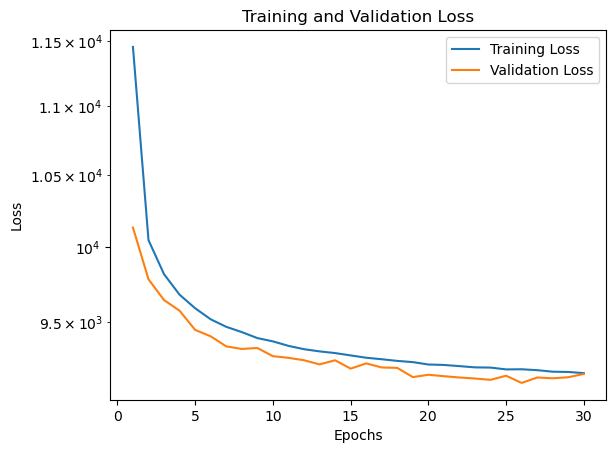

In [514]:
plt.figure()
plt.yscale('log')
epochs = range(1, len(train_loss)+ 1)   # Assuming one loss value per epoch

# Plotting the training and validation loss
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Display the plot
plt.show()

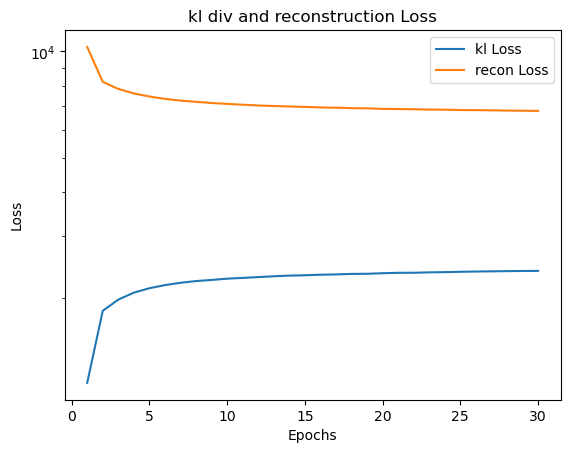

In [515]:
plt.figure()
plt.yscale('log')
epochs = range(1, len(train_loss)+ 1)   # Assuming one loss value per epoch

# Plotting the training and validation loss
plt.plot(epochs, kl_loss, label='kl Loss')
plt.plot(epochs, reconstruct_loss, label='recon Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('kl div and reconstruction Loss')
plt.legend()

# Display the plot
plt.show()

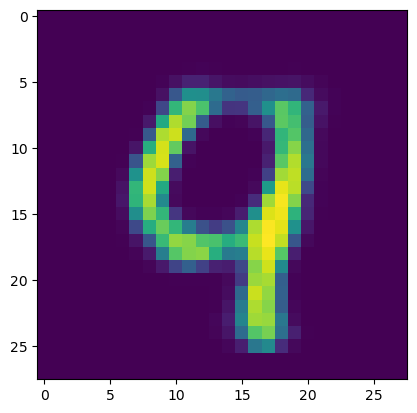

In [517]:
images, labels = next(iter(test_loader))

model.eval()
with torch.no_grad():
    output, mu, sig = model(images)


# logits = F.softmax(output)
logits = output

logits = logits.view(-1,28,28)

plt.imshow(logits[4])




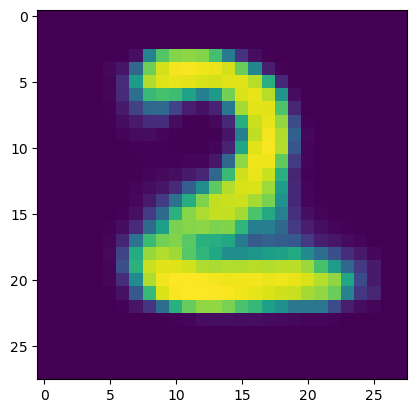

In [559]:
model.eval()
with torch.no_grad():
    sample = model.sample()
    
sample = sample.view(28,28)

plt.imshow(sample)